<h1> LAB-6: Single-layer and Multi-layer Feed-Forward Neural Network </h1>

<h2>Steps:
<ol>
<li>Load Dataset
<li> Make Dataset Iterable
<li> Create Model Class
<li> Instantiate Model Class
<li> Instantiate Loss 
<li> Instantiate Optimizer 
<li> Train Model </ol> </h2>

<h3> Model A: Building a Feed-forward Neural Network from scratch with 2-hidden layers </h3> 

In [15]:
import torch

#Input array
X = torch.Tensor([[1,0,1,0],[1,0,1,1],[0,1,0,1]])

#Output
y = torch.Tensor([[1],[1],[0]])

#Defining Sigmoid Function
def sigmoid (x):
    return 1/(1 + torch.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)
#Variable initialization
epoch=30 #Setting training iterations
lr=0.001 #Setting learning rate
inputlayer_neurons = X.shape[1] #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons for the 2 layers
output_neurons = 1 #number of neurons at output layer

#weight and bias initialization
wh1=torch.randn(inputlayer_neurons, hiddenlayer_neurons).type(torch.FloatTensor)
bh1=torch.randn(1, hiddenlayer_neurons).type(torch.FloatTensor)
wh2=torch.randn(hiddenlayer_neurons, hiddenlayer_neurons).type(torch.FloatTensor)
bh2=torch.randn(1, hiddenlayer_neurons).type(torch.FloatTensor)
wout=torch.randn(hiddenlayer_neurons, output_neurons)
bout=torch.randn(1, output_neurons)
for i in range(epoch):

  #Forward Propogation
        print("------------------------------")
        print("Epoch:", i,"\n")
        hidden_layer_input1 = torch.mm(X, wh1)
        hidden_layer_input11 = hidden_layer_input1 + bh1
        hidden_layer_activations1 = sigmoid(hidden_layer_input11)
        print("Activation vector from the 1st hidden layer:",hidden_layer_activations1, "\n")
        
        hidden_layer_input2 = torch.mm( hidden_layer_activations1, wh2)
        hidden_layer_input22 = hidden_layer_input2 + bh2
        hidden_layer_activations2 = sigmoid(hidden_layer_input22)
        print("Activation vector from the 2nd hidden layer:",hidden_layer_activations2)
        
        output_layer_input1 = torch.mm(hidden_layer_activations2, wout)
        output_layer_input = output_layer_input1 + bout
        output = sigmoid(output_layer_input1)
        print("Output:",output)
 #Backpropagation (error and gradient computation)
        E = y-output 
        print("Error:", E)
        slope_output_layer = derivatives_sigmoid(output)
        slope_hidden_layer1 = derivatives_sigmoid(hidden_layer_activations1)
        slope_hidden_layer2 = derivatives_sigmoid(hidden_layer_activations2)
        d_output = E * slope_output_layer
        Error_at_hidden_layer2 = torch.mm(d_output, wout.t())
        d_hiddenlayer2 = Error_at_hidden_layer2 * slope_hidden_layer2
        Error_at_hidden_layer1 = torch.mm(d_hiddenlayer2, wh2.t())
        d_hiddenlayer1 = Error_at_hidden_layer1 * slope_hidden_layer1
        wout += torch.mm(hidden_layer_activations2.t(), d_output) *lr
        bout += d_output.sum() *lr
        wh2 += torch.mm(hidden_layer_activations1.t(), d_hiddenlayer2) *lr
        bh2 += d_hiddenlayer2.sum() *lr
        wh1 += torch.mm(X.t(), d_hiddenlayer1) *lr
        bh1 += d_hiddenlayer1.sum() *lr
 

 #print('actual :\n', y, '\n')
print('predicted :\n', output)

------------------------------
Epoch: 0 

Activation vector from the 1st hidden layer: tensor([[0.7443, 0.1892, 0.2474],
        [0.4694, 0.3255, 0.0933],
        [0.8001, 0.1819, 0.3293]]) 

Activation vector from the 2nd hidden layer: tensor([[0.6526, 0.7444, 0.8976],
        [0.5883, 0.6805, 0.8863],
        [0.6663, 0.7494, 0.9024]])
Output: tensor([[0.3489],
        [0.3562],
        [0.3465]])
Error: tensor([[ 0.6511],
        [ 0.6438],
        [-0.3465]])
------------------------------
Epoch: 1 

Activation vector from the 1st hidden layer: tensor([[0.7443, 0.1892, 0.2474],
        [0.4693, 0.3255, 0.0933],
        [0.8001, 0.1819, 0.3293]]) 

Activation vector from the 2nd hidden layer: tensor([[0.6526, 0.7444, 0.8976],
        [0.5883, 0.6805, 0.8863],
        [0.6662, 0.7494, 0.9023]])
Output: tensor([[0.3490],
        [0.3563],
        [0.3466]])
Error: tensor([[ 0.6510],
        [ 0.6437],
        [-0.3466]])
------------------------------
Epoch: 2 

Activation vector from

<h3>Model B: 1 Hidden Layer Feedforward Neural Network on Diabetes Dataset (ReLU Activation) </h3>

In [18]:
#importing the libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load dataset
from sklearn.datasets import load_diabetes
data = load_diabetes()
x = data['data']
y = data['target']
#shape
print('shape of x is : ',x.shape)
print('shape of y is : ',y.shape)
data

shape of x is :  (442, 10)
shape of y is :  (442,)


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
#make dataset iterable
from torch.utils.data import Dataset, DataLoader
class Diabetesdataset(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x,dtype=torch.float32)
        self.y = torch.tensor(y,dtype=torch.float32)
        self.length = self.x.shape[0]
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
    def __len__(self):
        return self.length
print(x.shape[1])
dataset = Diabetesdataset(x,y)

10


In [4]:
#dataloader
dataloader = DataLoader(dataset=dataset,shuffle=True,batch_size=100)# if batch_size=1 (SGD), batch_size>1(mini-batch gradient descent)

<h3>Common types of Non-linearity (Activation Functions):</h3>
<ol>
<li>ReLUs (Rectified Linear Units)
<li>Sigmoid
<li>Tanh 
<li>Softmax
</ol> </h3>

In [5]:
#creating the network
from torch import nn
class net(nn.Module):
        def __init__(self,input_size,output_size):
            super(net,self).__init__()
            self.l1 = nn.Linear(input_size,5)
            self.relu = nn.ReLU()
            self.l2 = nn.Linear(5,output_size)
        def forward(self,x):
            output = self.l1(x) 
            output = self.relu(output)
            output = self.l2(output)
            return output

In [6]:
#instantiate the optimizer
model = net(x.shape[1],1)
criterion = nn.MSELoss()
#optimizer = torch.optim.SGD(model.parameters(),lr=0.001) # very noisy convergence because using only one data point for one update
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)#mini-batch gradient descent
epochs = 100

In [7]:
#backward propagation and computation of loss function
costval = []
for j in range(epochs):
    for i,(x_train,y_train) in enumerate(dataloader):
    #prediction
        y_pred = model(x_train)
    
    #calculating loss
        cost = criterion(y_pred,y_train.reshape(-1,1))
  
    #backprop
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
    #if j%50 == 0:
    print(cost)
    costval.append(cost)

tensor(27922.9941, grad_fn=<MseLossBackward0>)
tensor(25041.8066, grad_fn=<MseLossBackward0>)
tensor(32746.3477, grad_fn=<MseLossBackward0>)
tensor(29274.4082, grad_fn=<MseLossBackward0>)
tensor(23288.9902, grad_fn=<MseLossBackward0>)
tensor(31032.2891, grad_fn=<MseLossBackward0>)
tensor(32389.7559, grad_fn=<MseLossBackward0>)
tensor(28971.4043, grad_fn=<MseLossBackward0>)
tensor(31993.1875, grad_fn=<MseLossBackward0>)
tensor(29153.6992, grad_fn=<MseLossBackward0>)
tensor(20251.2891, grad_fn=<MseLossBackward0>)
tensor(17944.3594, grad_fn=<MseLossBackward0>)
tensor(15989.5566, grad_fn=<MseLossBackward0>)
tensor(23025.7793, grad_fn=<MseLossBackward0>)
tensor(23854.8535, grad_fn=<MseLossBackward0>)
tensor(18667.6914, grad_fn=<MseLossBackward0>)
tensor(25888.9844, grad_fn=<MseLossBackward0>)
tensor(24069.4277, grad_fn=<MseLossBackward0>)
tensor(21129.8594, grad_fn=<MseLossBackward0>)
tensor(22833.5352, grad_fn=<MseLossBackward0>)
tensor(18580.4043, grad_fn=<MseLossBackward0>)
tensor(22420.

Text(0.5, 0, 'Epoch')

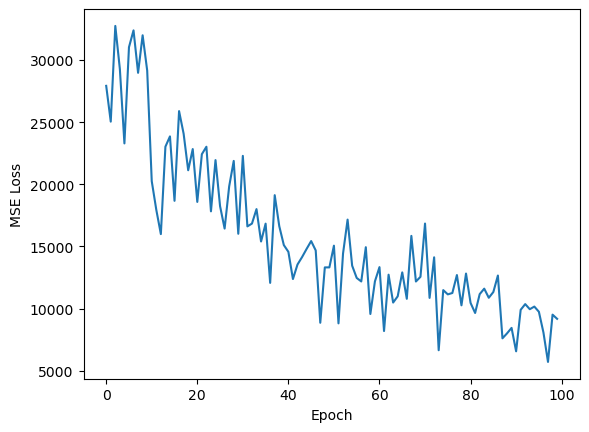

In [8]:
fi_los = [fl.item() for fl in costval ]
plt.plot(range(epochs), fi_los)
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')

<h3>Model B: 1 Hidden Layer Feedforward Neural Network on MNIST dataset (Sigmoid Activation) </h3>

In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from matplotlib import pyplot as plt
import numpy as np
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())
print(len(train_dataset))

print(len(test_dataset))

60000
10000


5
Labels:  tensor([2, 0, 8, 0, 5, 2, 8, 2, 2, 7, 9, 6, 5, 1, 1, 0, 7, 1, 3, 4, 4, 5, 7, 9,
        7, 4, 3, 0, 8, 3, 2, 3, 2, 8, 2, 5, 5, 0, 9, 8, 4, 5, 3, 7, 7, 3, 5, 3,
        5, 0, 8, 6, 0, 3, 0, 2, 1, 9, 0, 2, 7, 9, 4, 5, 4, 3, 8, 5, 6, 0, 5, 8,
        3, 1, 7, 2, 2, 6, 8, 4, 0, 4, 1, 8, 0, 2, 7, 9, 5, 9, 4, 2, 1, 4, 1, 2,
        2, 0, 1, 0])
Batch shape:  torch.Size([100, 1, 28, 28])


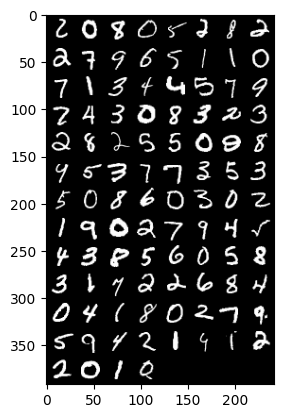

In [8]:
#batch sizes and calculation of epochs
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
#data visualization
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(),(1, 2, 0)))
dataiter = iter(train_loader)
images, labels = next(dataiter)
print('Labels: ', labels)
print('Batch shape: ', images.size())
show_batch(images)

In [11]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

In [12]:
input_dim = 28*28 #size of image
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

In [13]:
criterion = nn.CrossEntropyLoss()

In [14]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)  

In [15]:
print(model.parameters())

print(len(list(model.parameters())))

# FC 1 Parameters 
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

# FC 2 Parameters
print(list(model.parameters())[2].size())

# FC 2 Bias Parameters
print(list(model.parameters())[3].size())

<generator object Module.parameters at 0x0000029658D0E890>
4
torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [17]:
itr = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        itr += 1
        
        if itr % 100 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(itr, loss.item(), accuracy))

Iteration: 100. Loss: 0.9593334794044495. Accuracy: 82.16000366210938
Iteration: 200. Loss: 0.8217915296554565. Accuracy: 82.2300033569336
Iteration: 300. Loss: 0.7885783910751343. Accuracy: 82.22000122070312
Iteration: 400. Loss: 0.7019756436347961. Accuracy: 83.05000305175781
Iteration: 500. Loss: 0.7695503234863281. Accuracy: 83.05999755859375
Iteration: 600. Loss: 0.7392368912696838. Accuracy: 83.6500015258789
Iteration: 700. Loss: 0.7358237504959106. Accuracy: 83.75
Iteration: 800. Loss: 0.8115465641021729. Accuracy: 84.05999755859375
Iteration: 900. Loss: 0.7462843060493469. Accuracy: 84.31999969482422
Iteration: 1000. Loss: 0.7202913761138916. Accuracy: 84.2699966430664
Iteration: 1100. Loss: 0.8020601868629456. Accuracy: 84.81999969482422
Iteration: 1200. Loss: 0.7626819610595703. Accuracy: 84.83000183105469
Iteration: 1300. Loss: 0.6811631917953491. Accuracy: 85.08000183105469
Iteration: 1400. Loss: 0.6502394080162048. Accuracy: 85.16000366210938
Iteration: 1500. Loss: 0.60533

<h3>Model D: 2 Hidden Layers Feedforward Neural Network (Tanh Activation) </h3>

Iteration: 100. Loss: 1.6628329753875732. Accuracy: 67.83999633789062
Iteration: 200. Loss: 1.159762978553772. Accuracy: 77.91999816894531
Iteration: 300. Loss: 0.7491239309310913. Accuracy: 83.29000091552734
Iteration: 400. Loss: 0.5696026086807251. Accuracy: 86.2699966430664
Iteration: 500. Loss: 0.4830615520477295. Accuracy: 87.4800033569336
Iteration: 600. Loss: 0.4143054485321045. Accuracy: 88.43000030517578
Iteration: 700. Loss: 0.4337380528450012. Accuracy: 89.58999633789062
Iteration: 800. Loss: 0.39184650778770447. Accuracy: 90.0
Iteration: 900. Loss: 0.4071003198623657. Accuracy: 90.33999633789062
Iteration: 1000. Loss: 0.4151960015296936. Accuracy: 90.58999633789062
Iteration: 1100. Loss: 0.41129767894744873. Accuracy: 90.87999725341797
Iteration: 1200. Loss: 0.29510632157325745. Accuracy: 91.0999984741211
Iteration: 1300. Loss: 0.23926585912704468. Accuracy: 91.23999786376953
Iteration: 1400. Loss: 0.3148934841156006. Accuracy: 91.44000244140625
Iteration: 1500. Loss: 0.228

Text(0.5, 0, 'Epoch')

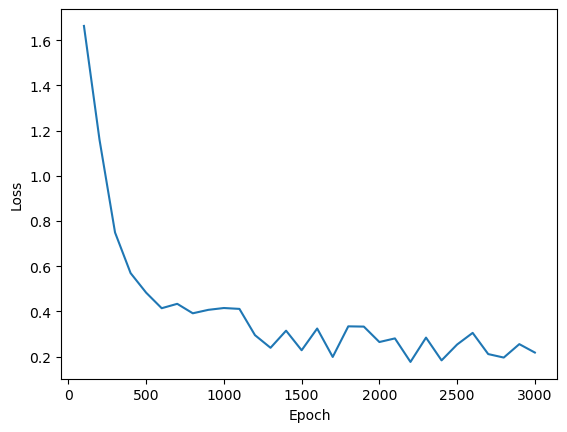

In [19]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
#from autograd import grad
'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.tan1 = nn.Tanh()
        
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tan2 = nn.Tanh()
        
        # Linear function 3 (readout): 100 --> 10
        self.fc3 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.tan1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tan2(out)
        
        # Linear function 3 (readout)
        out = self.fc3(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.0001

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) #, momentum=0.9 )

'''
STEP 7: TRAIN THE MODEL
'''
l = [] # for creating a list of losses
it = [] # for creating a list of iterations
itr = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels
         # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        itr += 1
        
        if itr % 100 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            
            
            it.append(itr)
            l.append(loss.item())
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(itr, loss.item(), accuracy))
plt.plot(it, l)
plt.ylabel('Loss')
plt.xlabel('Epoch')

<h2> Auto-Differentiation [Extra for understanding gradient computation]</h2>

In [19]:
#An example of gradient computation of a multivariate function
import torch
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
Q = 3*a**3 - b**2
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)
#check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [20]:
#computation of gradients using autograd module
#backpropagation uses the dynamically created graph
#torch.autograd is an engine for computing vector-Jacobian product.
#reverse-mode auto-differentiation
from torch.autograd import Variable
x, prev_h = Variable(torch.randn(1, 10), requires_grad=True), Variable(torch.randn(1, 20), requires_grad=True )
W_h, W_x = Variable(torch.randn(20, 20), requires_grad=True), Variable(torch.randn(20, 10), requires_grad=True)
i2h = torch.matmul(W_x, x.t())
h2h = torch.matmul(W_h, prev_h.t())
next_h = h2h + i2h
next_h = next_h.tanh()
loss = next_h.sum()
loss.backward() #compute gradient

In [21]:
#small snippet for computation of gradient of tanh function using grad function
import autograd.numpy as np  # Thinly-wrapped numpy
from autograd import grad    # The only autograd function you may ever need
def tanh(x):                 # Define a function
    y = np.exp(-2.0 * x)
    return (1.0 - y) / (1.0 + y)
grad_tanh = grad(tanh)       # Obtain its gradient function
grad_tanh(1.0)   

0.419974341614026

   <h3>References:</h3>
    <ol>
   <li> <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html" class="wikilink">https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html</a> </li>
    <li> <a href="https://pytorch.org/blog/overview-of-pytorch-autograd-engine/" class="wikilink">https://pytorch.org/blog/overview-of-pytorch-autograd-engine</a> </li>
    <li> <a href="https://www.analyticsvidhya.com/blog/2018/02/pytorch-tutorial/" class="wikilink">https://www.analyticsvidhya.com/blog/2018/02/pytorch-tutorial/</a> </li>
   </ol>

<h2> Exercise-1: </h2>
<ol>
<li> Create a 5-layer feed-forward Neural network, where each layer has 30 neurons to classify the breast_cancer dataset from sklearn.datasets library. Use activation functions- ReLU, Tanh and Sigmoid, use varying learning rates from 0.1, 0.01..so on till $1*10^{-6}$.
<li> For the above FFN, use an appropriate error function for the classification and use optimization fucntion mini-batch gradient descent of batch_size=20 and 30 respectively.
<li> Report the accuracy vs loss values.
<li> Also report, if we change the optimization function to Adam, how the accuracy changes?
</ol>

<h2> Exercise-2: </h2>
<ol>
<li> Compute the gradients for the function R = 10$a^{4}$ - 5$b^{3}$ + $c^{2}$.
</ol>

